a. State the null and alternative hypotheses.

b. What t-test is most appropriate to test the claim?

c. Conduct the appropriate statistical test and report the relevant output here.

d. What is the decision about the null hypothesis? Justify your answer.

e. Report your conclusion.


In [1]:
from scipy import stats
import pandas as pd
import seaborn as snb

data = pd.read_csv('t_testpractice.csv')
data.head()

,hopefulness,CommBefore,CommAfter,Group,HealthScore
0,5,126,115,1,77
1,3,133,125,1,88
2,6,126,96,1,77
3,2,115,115,1,90
4,7,108,119,1,68


In [3]:
#data.describe()
group1 =data[data['Group'] == 1]['HealthScore']
group2 =data[data['Group']== 2]['HealthScore']
group1

0    77
1    88
2    77
3    90
4    68
5    74
6    62
7    93
8    82
9    79
Name: HealthScore, dtype: int64

_______________


1. Twenty students were recruited to take part in a study about how expressive writing affects physical health. 10 students were randomly assigned to write about thoughts and feelings associated with the most traumatic events in their lives (treatment). The other 10 students wrote about their plans for the day (control). After one month, all students rated their overall level of physical health on a scale from 0 (very poor health) to 100 (perfect health).


a. <br> 
H0: Wrtiting down thoughts and feelings every day about traumatic events in one's life or journaling about plans for the day has no affect on one's physical health. <br>
    HA: By writing down thoughts and feelings every day about traumatic events in one's life or about plans for the day will affect you physical health in a positive manner.<br>
    HA != H0<br><br>
b.  This is a In-Between subjects study and those two groups are tested independent from each other. The data type is continuous and parametic assumptions have been met. Because of that, we are going to use the independent-samples t-test. 


In [4]:
# c.
stats.ttest_ind(group1, group2)
# df 10 +10 -2 people 
# the hgihter the stastic the higher the difference in mean
#t(18) = 2.424.....

TtestResult(statistic=2.4248978513811315, pvalue=0.026058295175946804, df=18.0)



d. Because the p-value is smaller than 0.05, we reject H0 and retain the alternative hypothesis which means that the it does have a positive influence to journal.
<br>
e. After analyzing this scenario with an indepent t-test we can conclude that our thesis about writing a daily journal either on traumatic or about your general daily life, can improve you healthlevel score and therefore your psychial health. As one can see there are no signigicant. ouitlier in the data. <br  ><br>
___________________


2. You want to study how a devastating flood impacts the hope of citizens in a small rural community. 20 citizens are randomly selected to rate how hopeful they felt on a 7-point scale, where 4 is a neutral response. You want to determine if the hopefulness ratings are above or below the neutral position.


a. State the null and alternative hypotheses. <br>
H0: The hope of the citizen will change by the devastating flood impact and therefore the the 7-point scale value will be 4 as neutral response.<br>
HA: The hopefulness rating will raise below the neutral position as a reaction o the devastatig flood impacts.


b. What t-test is most appropriate to test the claim?<br>
One-Sample t-test becasue we just have one group of 20 text person.



In [10]:
# c. Conduct the appropriate statistical test and report the relevant output here.
stats.ttest_1samp(data['hopefulness'], popmean = 4)

TtestResult(statistic=1.7030301014602627, pvalue=0.10486551410069787, df=19)

d. What is the decision about the null hypothesis? Justify your answer.
The p-value is above 0.05 so that we retain out null hypothesis.
e. Report your conclusion.
Conluding we keep our null-hypothesis which means that the hope of the citizen does not change due to the devastating flood impact. 
______________


3. A researcher wanted to determine if the communication quality of couples changes after receiving premarital counseling. Communication quality was assessed three months before and again three months after the marriage.


a. State the null and alternative hypotheses. <br>
H0: Receiving premarital counseling has no effect on the quality of communication between couples; any observed differences are due to random variation.<br>
HA: Receiving premarital counseling will change the communication quality of couples. 


b. What t-test is most appropriate to test the claim?<br>
Paired-ttest as both experients were tested on the same group of people if the data is normally distributed. In the next step this is going to be tested.

In [7]:
# c. Conduct the appropriate statistical test and report the relevant output here.

#test both data sets on normalitly
statistic, p_value = stats.normaltest(data['CommAfter'])
print(statistic)
print(p_value)

2.22200247353882
0.32922915965787625


In [8]:
statistic, p_value = stats.normaltest(data['CommBefore'])
print(statistic)
print(p_value)

2.770391086989921
0.2502748553865489


In both cases the p-values are both above 0.05, so the data sets pass the normality test. Now we apply the paired t-test.

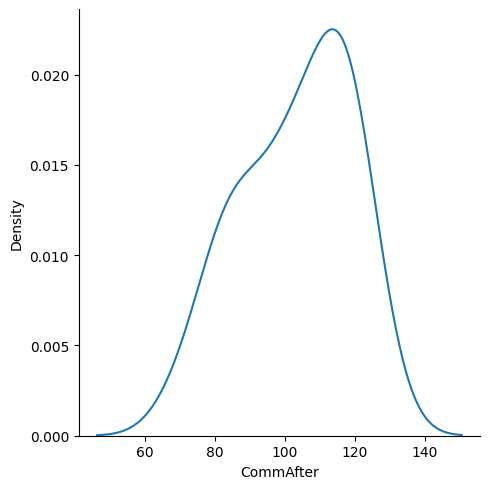

In [2]:
stats.ttest_rel(data['CommAfter'], data['CommBefore'])
snb.displot(data["CommAfter"], kind = "kde")

d. What is the decision about the null hypothesis? Justify your answer.
The p-value is below 0.05 so that we reject the null-hypothesis and accept our  alternative hypothesis. So, based on the ttest recieving premarital counseling will change the communication quality of couples. <br>
e. Report your conclusion.
After doing the nromality test, a paired ttest is as suitable statistical test. After deciding to reject the Null-hypothesis we can conclude that there will be a change in communication.


## Daniele Exam for me

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sb
np.random.seed(26)
data = pd.DataFrame({'Approach1_grade': np.clip(np.random.normal(loc = 30, scale = 10, size = 100),0 ,100),
                     'Approach2_grade': np.clip(np.random.normal(loc = 40, scale = 35, size = 100),0 ,100)})
approach1 = data['Approach1_grade']
approach2 = data['Approach2_grade']
approach1.describe()

count    100.000000
mean      30.355538
std        9.688942
min        8.876066
25%       23.555077
50%       30.416351
75%       36.243449
max       57.459253
Name: Approach1_grade, dtype: float64

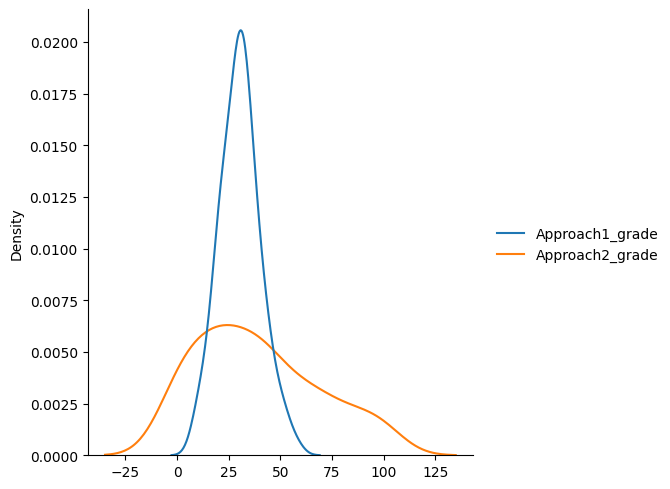

In [21]:
sb.displot(data = data[['Approach1_grade', 'Approach2_grade']],kind='kde')

Research question: Does utilizing the new planner improve the robotic soccer game for the team?
H0: There is no improvement with the new planner.
H1: The planer does change the game play and will be assigned with a better grade than palying with the older planer.
T-test: paired t-test, two experiements on the same group of people


In [11]:
stats.normaltest(approach1)
stats.normaltest(approach2)

NormaltestResult(statistic=8.148915159178712, pvalue=0.01700143410120781)

Because both pvalues of the normal test are above 0.05 we can say that the data is normal distributed. 

In [12]:
stats.ttest_rel(approach1, approach2)

TtestResult(statistic=-3.0619588011538243, pvalue=0.0028314218455114887, df=99)

Because the pvalue is  below 0.05 we reject H0 and can say therefore that there is a change by using the new planner. As one can see in the plot there are some outliers. The values from both sample vary a lot.  